# Homework 3 Gradient descent

## Daniel Sierra Botero C.C. 1152216176

Realize numerically gradient descent method on the "data.csv" which represent some linear regression problem (fitting)

In [1]:
#Load python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#function to obtain the optimal values of theta_0 and theta_1, and the values of the cost functions MSE, MAE and MAPE
def gradientdescent(theta_0,theta_1,x,y,epoch,alpha):
    #amount of data
    m=len(x)
    #loss functions arrays
    mse = np.zeros(epoch)
    mae = np.zeros(epoch)
    mape = np.zeros(epoch)
    #loop for the number of steps of the gradientdescent
    for i in range(epoch):
        #hypothesis function
        h_0 = theta_1*x + theta_0
        #value of loss functions
        mse[i] = (1/m) * np.sum((y - h_0)*(y - h_0))
        mae[i] = (1/m) * np.sum(np.abs(y - h_0)) 
        mape[i] = (100/m) * np.sum(np.abs((y - h_0)/y))
        #derivatives on theta
        dt_0 = - (1/m)*np.sum(y - h_0)
        dt_1 = - (1/m)*np.sum((y - h_0)*x)
        #update of theta values
        theta_0 = theta_0 - alpha*dt_0
        theta_1 = theta_1 - alpha*dt_1
        
    return theta_0,theta_1,mse,mae,mape

In [3]:
#reading the data
data_df = pd.read_csv('data.csv',names=['x','y'])
data_df

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [4]:
#separate the arrays
x = data_df['x'].to_numpy()
y = data_df['y'].to_numpy()

In [5]:
#apply the function with the values:
#theta_1 = 10, theta_0 = 10, alpha = 0.0001 and epochs = 100
theta_0,theta_1,mse,mae,mape = gradientdescent(10,10,x,y,100,0.0001)

In [36]:
#using scipy.optimize
def function(x, theta_1, theta_0):
    return theta_1*x + theta_0
#theta_0 and theta_1
p_0 = [10, 10]
#fit results
opt_val, cov = curve_fit(function,x,y,p_0,method='lm')

In [8]:
opt_val

array([1.32243102, 7.99102142])

Text(0.5, 1.0, 'MAPE')

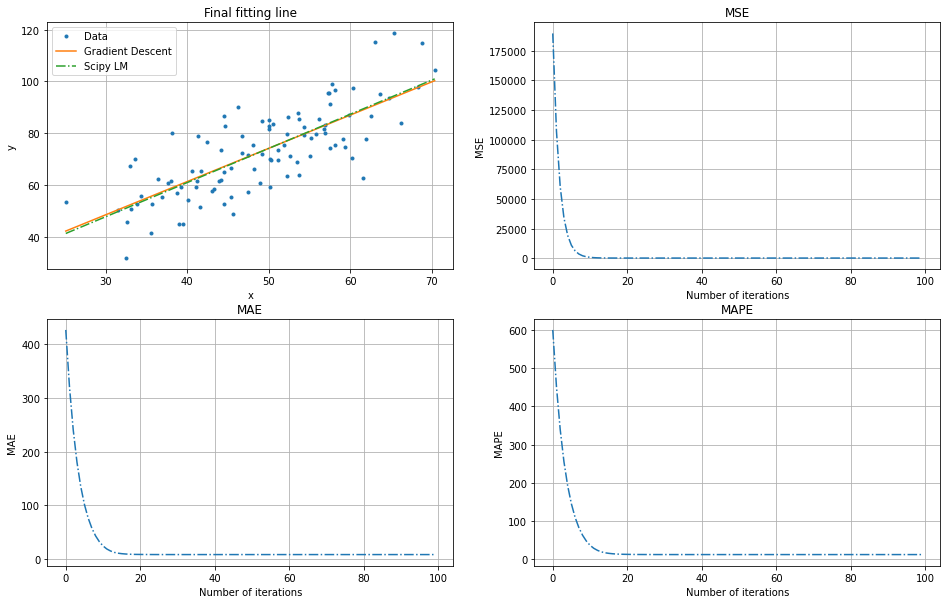

In [62]:
#graphs
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

#gradient descent vs scipy.optimize
x_=np.linspace(min(x),max(x),100)

ax[0,0].set_title('Final fitting line')
ax[0,0].plot(x, y, '.', label='Data')
ax[0,0].plot(x_, function(x_, theta_1, theta_0), label='Gradient Descent')
ax[0,0].plot(x_, function(x_, opt_val[0], opt_val[1]),'-.', label='Scipy LM')
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].grid()
ax[0,0].legend()

#MSE 
ax[0,1].plot(np.arange(100), mse, '-.')
ax[0,1].set_ylabel('MSE')
ax[0,1].set_xlabel('Number of iterations')
ax[0,1].grid()
ax[0,1].set_title('MSE')

#MAE
ax[1,0].plot(np.arange(100), mae, '-.')
ax[1,0].set_ylabel('MAE')
ax[1,0].set_xlabel('Number of iterations')
ax[1,0].grid()
ax[1,0].set_title('MAE')

#MAPE
ax[1,1].plot(np.arange(100), mape, '-.')
ax[1,1].set_ylabel('MAPE')
ax[1,1].set_xlabel('Number of iterations')
ax[1,1].grid()
ax[1,1].set_title('MAPE')

In [77]:
#for different values of alpha
alphas = np.linspace(0.0001,0.001,5)
#arrays to save the results
t0_a = []
t1_a = []
mse_a = []
mae_a = []
mape_a = []
#loop to apply gradient descent for the different alphas
for i in range(5):
    gradient = gradientdescent(10,10,x,y,100,alphas[i])
    t0_a.append(gradient[0])
    t1_a.append(gradient[1])
    mse_a.append(gradient[2])
    mae_a.append(gradient[3])
    mape_a.append(gradient[4])

Note: to better see the behavior of the cost functions as a function of the $\alpha$ parameter, the results are plotted on a logarithmic scale

Text(0.5, 1.0, 'MAPE')

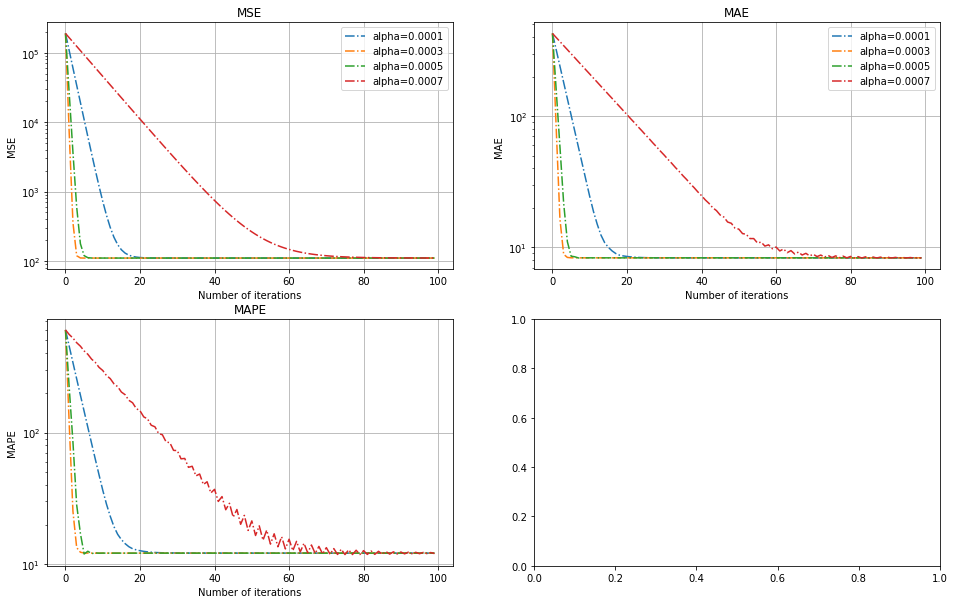

In [103]:
#graphs
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

#MSE 
ax[0,0].semilogy(np.arange(100), mse_a[0], '-.', label='alpha=0.0001')
ax[0,0].semilogy(np.arange(100), mse_a[1], '-.', label='alpha=0.0003')
ax[0,0].semilogy(np.arange(100), mse_a[2], '-.', label='alpha=0.0005')
ax[0,0].semilogy(np.arange(100), mse_a[3], '-.', label='alpha=0.0007')
#ax[0,0].semilogy(np.arange(100), mse_a[4], '-.', label='alpha=0.0009')
ax[0,0].set_ylabel('MSE')
ax[0,0].set_xlabel('Number of iterations')
ax[0,0].grid()
ax[0,0].legend()
ax[0,0].set_title('MSE')

#MAE
ax[0,1].semilogy(np.arange(100), mae_a[0], '-.', label='alpha=0.0001')
ax[0,1].semilogy(np.arange(100), mae_a[1], '-.', label='alpha=0.0003')
ax[0,1].semilogy(np.arange(100), mae_a[2], '-.', label='alpha=0.0005')
ax[0,1].semilogy(np.arange(100), mae_a[3], '-.', label='alpha=0.0007')
#ax[0,1].plot(np.arange(100), mae_a[4], '-.', label='alpha=0.0009')
ax[0,1].set_ylabel('MAE')
ax[0,1].set_xlabel('Number of iterations')
ax[0,1].grid()
ax[0,1].legend()
ax[0,1].set_title('MAE')

#MAPE
ax[1,0].semilogy(np.arange(100), mape_a[0], '-.', label='alpha=0.0001')
ax[1,0].semilogy(np.arange(100), mape_a[1], '-.', label='alpha=0.0003')
ax[1,0].semilogy(np.arange(100), mape_a[2], '-.', label='alpha=0.0005')
ax[1,0].semilogy(np.arange(100), mape_a[3], '-.', label='alpha=0.0007')
#ax[1,0].plot(np.arange(100), mape_a[4], '-.', label='alpha=0.0009')
ax[1,0].set_ylabel('MAPE')
ax[1,0].set_xlabel('Number of iterations')
ax[1,0].grid()
ax[0,1].legend()
ax[0,1].legend()
ax[1,0].set_title('MAPE')

The results for $\alpha > 0.0007$ are not plotted because the gradient decsent process does not converge and the loss functions increase drastically, it can be seen if these plots are uncommented. In this case we can also see that the optimal $\alpha$ value is found close to $\alpha = 0.0003$ since it is the case where the cost functions converge faster